In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [11]:
furniture = pd.read_excel(r"C:\Users\SIBUL\Documents\DATA SCIENCE 4 ALL\Self_paced\POC\Superstore.xls")

In [12]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [16]:
furniture.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


In [14]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [15]:
furniture = furniture.set_index('Order Date')

In [18]:
y = furniture['Sales'].resample('MS').mean()

In [19]:
y.head()

Order Date
2014-01-01     647.131591
2014-02-01     225.994600
2014-03-01    2320.458708
2014-04-01    1178.972708
2014-05-01     844.581679
Freq: MS, Name: Sales, dtype: float64

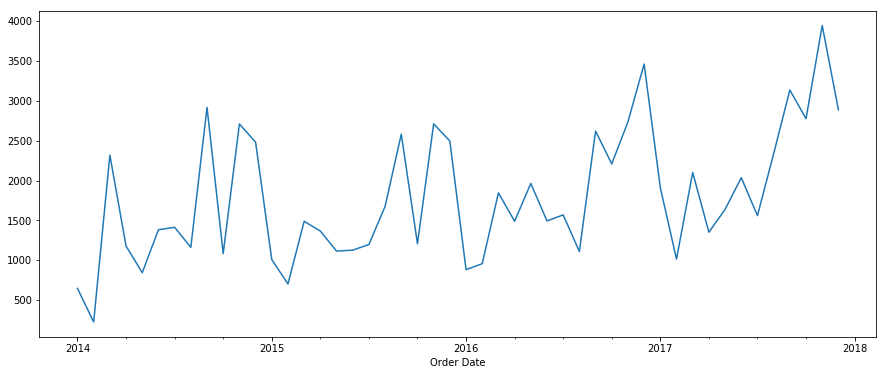

In [20]:
y.plot(figsize=(15, 6))
plt.show()

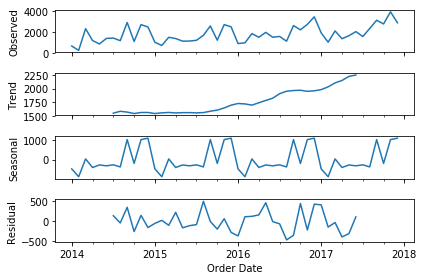

In [21]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [24]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:849.2964734613763


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1354.789359190144
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:542.5524077991603
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:556.403053968139


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1297.5498469791344
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:379.31311116746053
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:800.954661500103
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3049.9563364223277
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:528.8097917495911
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:558.3100438892479
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:19239.403741646845
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:378.64439838329054
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:761.9496656182114


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1528.436719488531
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:545.4367571117439
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:549.6307002149173


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1200.4748966123018
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:367.6372959140954
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:726.882221981232
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2778.1091194678193
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:506.5102043890885
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:539.5587096464646
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2542.5690397343883
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:355.7631592753857
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:777.9055059640485


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1063.5370058618478
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:543.6595443248249
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:548.4301230014621


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1396.3257528849244
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:362.403314061649
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:745.0593148966313
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:26164.34203336227
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:529.4623072731888
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:536.5790995613336
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:154660.543663565
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:357.3014613239143
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:753.5151712720058


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1195.1381601997266
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:535.7885418383611
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:528.5408441618692


C:\Users\SIBUL\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1235.935924293417
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:347.54883822153903
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:728.4101661769323
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2809.242162654113
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:508.2854500932564
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:524.7930009179072
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:4534.647819178573
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.1266572061527


In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0285      0.408     -0.070      0.944      -0.828       0.771
ma.L1         -1.0227      0.828     -1.235      0.217      -2.645       0.600
ar.S.L12      -0.4943      0.235     -2.105      0.035      -0.955      -0.034
sigma2      2.153e+05   2.47e+05      0.873      0.383   -2.68e+05    6.98e+05


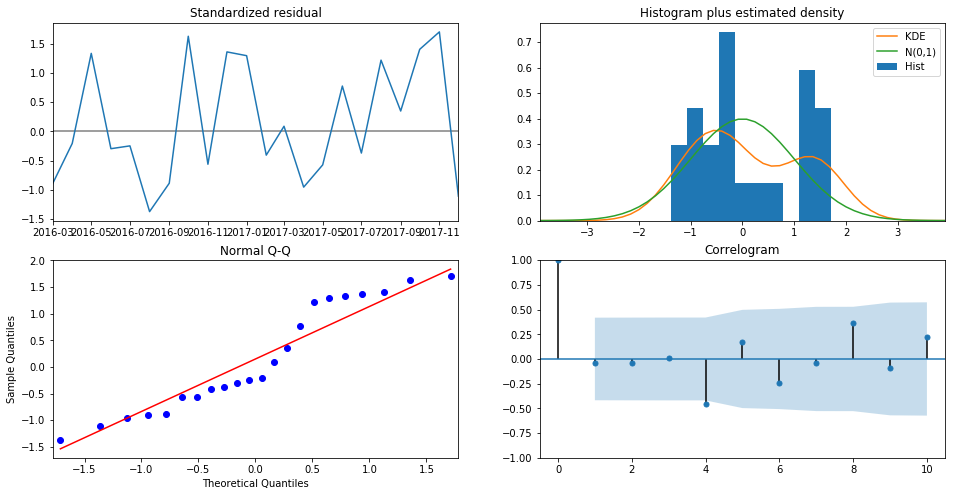

In [26]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

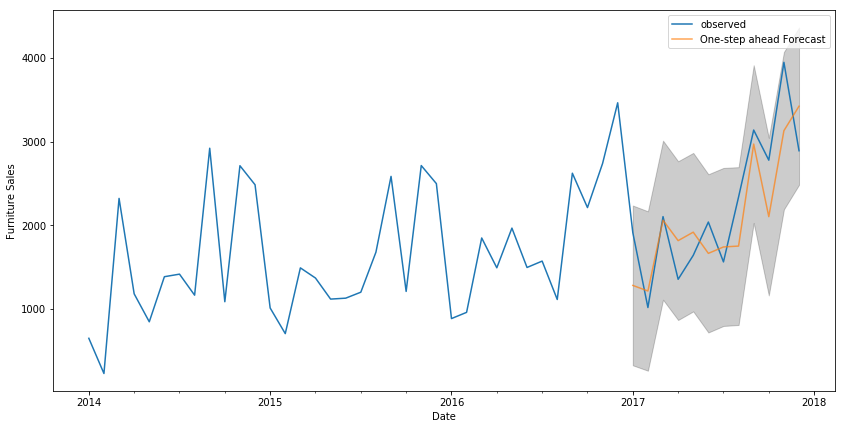

In [27]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [28]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 223875.43


In [29]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 473.15
